<a href="https://colab.research.google.com/github/fahammed2022/Classification-and-Regression/blob/main/Multiclass%20classification%20of%20newswires%20using%20the%20Reuters%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning
## Dr Marques
## Project 2
## Name: Fahad Ahammed
##Z number: Z23685691
## Notebook URL: https://colab.research.google.com/drive/1PCzcN7fJufGb1200P7zS4D8Q0KyMJrfa?usp=sharing

Deep learning solutions for:
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb
- https://developers.google.com/machine-learning/guides/text-classification/
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

#### (OPTIONAL) TODO 1

This URL helped to understand various performce metrics https://neptune.ai/blog/evaluation-metrics-binary-classification

## Setup

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture.

### **Answer for Part 1 Questions**

**(1) What type of preprocessing was applied to the raw input data? Why was it necessary to do so?**

**Answer:** In this Binary classification problem, Multi-hot encoding was applied to the raw input data. We can’t directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous batches of data. We have to turn this lists into tensors and Multi-hot encode lists to turn them into vectors of 0s and 1s.


**(2) Does your model suffer from overfitting? If so, what would you suggest doing about it?**

**Answer:** Yes! This model suffers from overfitting. We can see the training loss decrease gradually but the validation loss goes up after 4 epochs. So this model performs better on the training data and isn’t necessarily doing better on data it has never seen before.

To get rid of this situation, we can stop the training process after 4 epochs. In addition, adding more layers and using different loss functions and activators may impact the training process and can reduce the chances of overfitting.

**3) Is accuracy a good metric of success in this case? Why (not)?**

**Answer:** Yes! Accuracy seems a good metric of success in this binary classification problem. The formula for accuracy is the division between the number of correct answers and the total of the answers. Also, the accuracy works with both type 1 and type 2 errors. We can see that when the training loss decreases with every epoch, then the training accuracy increases with every epoch. So good accuracy also means a decent loss of the training processes. Accuracy works well when the class is balanced, which means both positive and negative classes have equal instances. In our case, we have equal positive-negative reviews. That's why I would consider accuracy as a good metric here.

### Load and prepare the data

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "") for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


### (OPTIONAL) TODO 2

Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

In [ ]:

train_labels[1] # Negetive reviews

word_index_neg = imdb.get_word_index()
reverse_word_index_neg = dict(
    [(value, key) for (key, value) in word_index_neg.items()])
decoded_review_neg = " ".join(
    [reverse_word_index_neg.get(f - 3, "") for f in train_data[1]])


print("Positive Label:", decoded_review)
print("Negative Label:", decoded_review_neg)


Positive Label:  this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don'

### Building your model

#### Model definition

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5326 - accuracy: 0.7627 - val_loss: 0.3889 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3123 - accuracy: 0.8984 - val_loss: 0.3181 - val_accuracy: 0.8752
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2356 - accuracy: 0.9196 - val_loss: 0.2967 - val_accuracy: 0.8811
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1887 - accuracy: 0.9370 - val_loss: 0.2746 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1573 - accuracy: 0.9471 - val_loss: 0.2789 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1316 - accuracy: 0.9589 - val_loss: 0.3158 - val_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1175 - accuracy: 0.9631 - val_loss: 0.3043 - val_accuracy: 0.8848
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

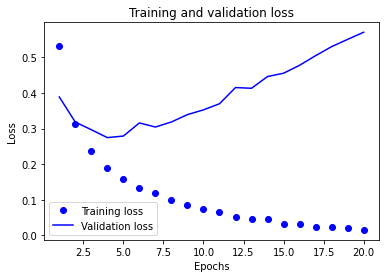

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

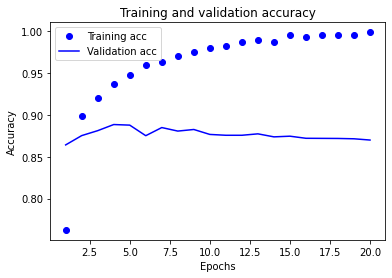

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 3

Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

Comment on the mistakes and what you believe might have caused each of them.


In [ ]:
predicted = model.predict(x_val)

pred = y_val

wrong = [i for i in range(len(pred)) if pred[i] != predicted[i]]

print('Network classified the following', len(wrong), 'test inputs incorrectly:')
misclassifications = [predicted[i] for i in wrong]
print("The two predicted values are")
print(misclassifications[:2])
print("The two truth values are")
print(predicted[:2])


313/313 [==============================] - 1s 4ms/step
Network classified the following 9470 test inputs incorrectly:
The two predicted values are
[array([0.9999949], dtype=float32), array([9.2162474e-05], dtype=float32)]
The two truth values are
[[9.9999487e-01]
 [9.2162474e-05]]


### (OPTIONAL) TODO 4

Write code to try different combinations of:
- numbers of hidden layers and units per layer
- loss functions
- activation functions

Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

**I have used here a different structured model than the actual one. I have reduced one hidden layer and changed the optimizer from "rmsprop" to "adam". Now the result varies a bit but not tremendously. We can also see the overfitting here. Please find the attached images below for loss and accuracy.**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

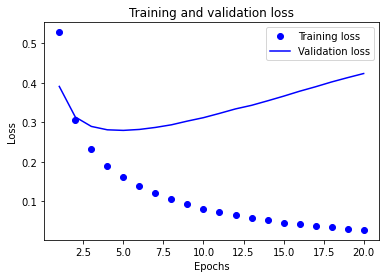

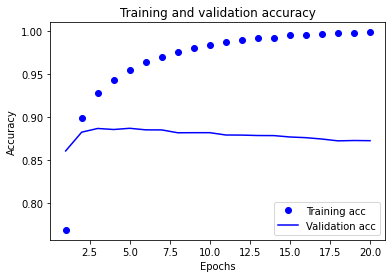

### Retraining a model from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.4593 - accuracy: 0.8138
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2697 - accuracy: 0.9038
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2114 - accuracy: 0.9235
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2882 - accuracy: 0.8864


### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.21967764],
       [0.9999058 ],
       [0.8199144 ],
       ...,
       [0.10669003],
       [0.06995127],
       [0.6334424 ]], dtype=float32)

## PART 2 - Multiclass classification of newswires using the Reuters dataset

Once again, we will start with a simple solution using a fully-connected neural network architecture.

### **Answer for Part 2 Questions**

**(1) What type of preprocessing was applied to the raw input data? Why was it necessary to do so?**

**Answer:** In this Multi-class classification problem, one-hot encoding was applied to the raw input data. To vectorize the labels, One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in place of the label index.

We can’t directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous batches of data. Thats why we vectorized the data here.

**(2) How many categories are there in this case?**

**Answer:** We have a total of 46 categories in this classification problem. Because we have 46 classes, this problem is an instance of multiclass classification, and because each data point should be classified into only one category, the problem is more specifically an instance of single-label multiclass classification.

**(3) Does your model suffer from overfitting? If so, what would you suggest doing about it?**

**Answer:** This model also suffers from overfitting like the previous example of the binary classification problem. We can see the training loss decrease gradually but the validation loss goes up after 9 epochs and begins to overfit. To get rid of the overfitting we can follow the previous solution such as stopping the training process after 9 epochs. In addition, adding more layers and using different loss functions and activators may impact the training process and can reduce the chances of overfitting.

**(4) Is accuracy a good metric of success in this case? Why (not)?**

**Answer:** Accuracy is one of the most popular metrics in multi-class classification problems and it is directly computed from the confusion matrix. Also, the accuracy works with both type 1 and type 2 errors. Additionally, Accuracy works on the balanced dataset and here we have 10 examples from each of the 46 categories. In this case, our dataset is a balanced one and the task is a multi-class classification problem, I would say that accuracy is a good metric for this problem.

### The Reuters dataset

#### Loading the Reuters dataset

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 43ms/step - loss: 2.6560 - accuracy: 0.4876 - val_loss: 1.8070 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.5300 - accuracy: 0.6879 - val_loss: 1.4055 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.1856 - accuracy: 0.7471 - val_loss: 1.2096 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 0.9683 - accuracy: 0.7874 - val_loss: 1.0825 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.8005 - accuracy: 0.8259 - val_loss: 1.0151 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6623 - accuracy: 0.8594 - val_loss: 0.9428 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5521 - accuracy: 0.8834 - val_loss: 0.9399 - val_accuracy: 0.7990
Epoch 8/20
16

#### Plotting the training and validation loss

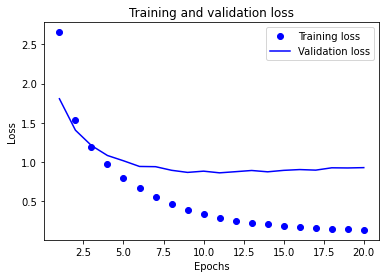

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

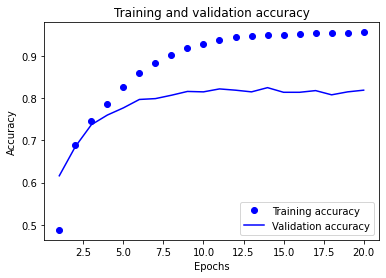

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 5

Write code to try different combinations of:
- numbers of hidden layers and units per layer

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

**This time I have added two extra dense layers with 64 neurons and a "relu" activator. Changed the optimizer from "rmsprop" to "adam" and also used mean_squared_error as a loss function. Now the model shows much better performance. Please find the attched accuracy and loss plots below**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

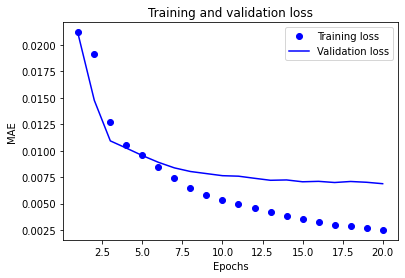

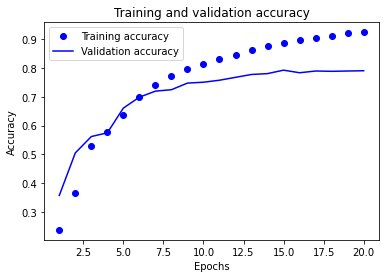

### Retraining a model from scratch

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.6136 - accuracy: 0.5029
Epoch 2/9
18/18 [==============================] - 0s 17ms/step - loss: 1.4814 - accuracy: 0.6839
Epoch 3/9
18/18 [==============================] - 0s 21ms/step - loss: 1.1243 - accuracy: 0.7517
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9040 - accuracy: 0.8062
Epoch 5/9
18/18 [==============================] - 0s 18ms/step - loss: 0.7435 - accuracy: 0.8402
Epoch 6/9
18/18 [==============================] - 0s 27ms/step - loss: 0.6081 - accuracy: 0.8754
Epoch 7/9
18/18 [==============================] - 0s 17ms/step - loss: 0.4986 - accuracy: 0.8987
Epoch 8/9
18/18 [==============================] - 0s 17ms/step - loss: 0.4217 - accuracy: 0.9155
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9124 - accuracy: 0.7916


In [ ]:
results

[0.9123827815055847, 0.7916295528411865]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17764915405164738

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.9999998

In [ ]:
np.argmax(predictions[0])

3

## PART 3 - Regression for house price estimation using the Boston Housing Price dataset

### **Answer for Part 3 Questions**

**(1) What type of preprocessing was applied to the raw input data? Why was it necessary to do so?**

**Answer:** In this regression problem we used another type of data preprocessing technique which is called Normalization. Data normalization is a process where for each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation.

It is necessary cause It would be problematic to feed into a neural network values that all take wildly different ranges. The model might be able to automatically adapt to such heterogeneous data, but it would definitely make learning process more difficult. Thats why we used normalization for our input data.

**2) Why is this problem a case of regression (rather than classification)?**

**Answer:** This problem we dont need to define or make label of the given data. We need to predict rather than classify. This problem we need to predict the house price of Boston depending on its 13 features. Which consists of predicting a continuous value instead of a discrete label. Thats why this is a regression problem not a classification problem.

**3) Does your model suffer from overfitting? If so, what would you suggest doing about it?**

**Answer:** We can see that the model starts suffering for overfitting after 120–140 epochs as well as the validation MAE stops improving significantly **(this number includes the 10 epochs we omitted)**.

To get rid of this issue we can adjust the number of epoch. We can also tune the parameter and can adjust the size of the intermediate layers. In our text book we can see that after adjusting the parameters to pochs=130, batch_size=16, verbose=0, the model imporved a bit.

**(4) Is mean absolute error (MAE) a good metric of success in this case? Why (not)?**

**Answer:** The MAE score is calculated as the average of the absolute error values. The difference between an expected and predicted value may be positive or negative and is forced to be positive when calculating the MAE. In this regression model, we predicted the house price based on 13 numeric features. And MAE gave us how well our model performed. So it tells about the difference of what is the actual price and what is the predicted price by the regression model, which clearly depicts the performance of the model. That's why I can say that in our regression model, MAE shows the error very reasonably and it can be a good metric of success.


### The Boston Housing Price dataset

#### Loading the Boston housing dataset

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

#### Model definition

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[1.9040584564208984, 2.4545857906341553, 2.346839427947998, 2.5115411281585693]

In [ ]:
np.mean(all_scores)

2.3042562007904053

#### Saving the validation logs at each fold

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

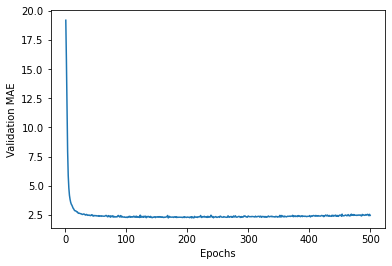

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

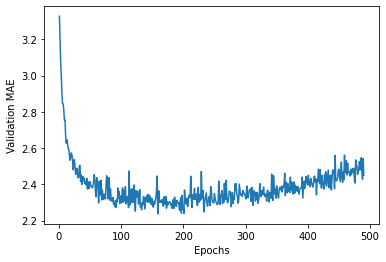

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.1227 - mae: 2.5705


In [ ]:
test_mae_score

2.5704596042633057

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([7.8704405], dtype=float32)

### (OPTIONAL) TODO 6

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

### CONCLUSIONS

In this project, we learned different types of deep learning problems such as classifications and regression. We implemented both binary classification and multi-class classification, as well as regression. We saw different model structure with different layers and different optimizers. As well as for regression, we used mean absolute error as a loss function. The MAE score is calculated as the average of the absolute error values. The difference between an expected and predicted value may be positive or negative and is forced to be positive when calculating the MAE. So we Learned how to implement deep learning solutions to classical problems in
regression and (binary and multiclass) classification using Python, Keras, and TensorFlow. In addition, we saw how to implement, train, and evaluate fully connected neural networks.